In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load embeddings file

# input the path to your saved embeddings
path = '/Users/ellenbowen/Desktop/Michigan/Siwo_lab/'
file = str(path) + 'phecode_voyage_embedding.pkl'

embeddings_df = pd.read_pickle(file)

In [4]:
embeddings_df

,phecode,phenotype,phecode_exclude_range,sex,rollup,leaf,category_number,category,embeddings
0,8.00,Intestinal infection,001-009.99,NaN,1,0,1,infectious diseases,"[-0.0158908162266016, 0.035250891000032425, 0...."
1,8.50,Bacterial enteritis,001-009.99,Both,1,0,1,infectious diseases,"[-0.0012496799463406205, 0.03793037682771683, ..."
2,8.51,Intestinal e.coli,001-009.99,Both,1,1,1,infectious diseases,"[-0.010055524297058582, 0.047426193952560425, ..."
3,8.52,Intestinal infection due to C. difficile,001-009.99,Both,1,1,1,infectious diseases,"[-0.02957858145236969, 0.04090549424290657, 0...."
4,8.60,Viral Enteritis,001-009.99,Both,1,1,1,infectious diseases,"[-0.005069051403552294, 0.03614606708288193, 0..."
...,...,...,...,...,...,...,...,...,...
1861,994.00,Sepsis and SIRS,994-994.99,NaN,1,0,18,injuries & poisonings,"[-0.015241697430610657, 0.029900213703513145, ..."
1862,994.10,Systemic inflammatory response syndrome (SIRS),994-994.99,Both,1,1,18,injuries & poisonings,"[-0.025385240092873573, 0.03399652987718582, 0..."
1863,994.20,Sepsis,994-994.99,Both,1,0,18,injuries & poisonings,"[-0.019122302532196045, 0.027068229392170906, ..."
1864,994.21,Septic shock,994-994.99,Both,1,1,18,injuries & poisonings,"[-0.03575393557548523, 0.03473980724811554, 0...."


In [5]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Ensure embeddings are in the correct format
def parse_embedding(embedding):
    if isinstance(embedding, str):
        return np.array(eval(embedding))
    return np.array(embedding)

embeddings_df['embeddings'] = embeddings_df['embeddings'].apply(parse_embedding)
embeddings = np.vstack(embeddings_df['embeddings'].values)

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(embeddings)

# Create a DataFrame for the similarity matrix with phenotype labels
similarity_df = pd.DataFrame(cosine_sim_matrix, index=embeddings_df['phenotype'], columns=embeddings_df['phenotype'])






In [6]:
similarity_df

phenotype,Intestinal infection,Bacterial enteritis,Intestinal e.coli,Intestinal infection due to C. difficile,Viral Enteritis,Intestinal infection due to protozoa,Tuberculosis,Diseases due to other mycobacteria,Leprosy,Septicemia,...,Toxic effect of carbon monoxide,"Toxic effect of other gases, fumes, or vapors",Toxic effect of noxious substances eaten as food,"Toxic effect of other substances, chiefly nonmedicinal as to source",Effects radiation NOS,Sepsis and SIRS,Systemic inflammatory response syndrome (SIRS),Sepsis,Septic shock,Complications peculiar to certain specified procedures
phenotype,,,,,,,,,,,,,,,,,,,,,
Intestinal infection,1.000000,0.962288,0.969029,0.968908,0.963056,0.974034,0.909554,0.907474,0.909978,0.923329,...,0.874851,0.856567,0.886004,0.877113,0.858259,0.893984,0.903401,0.934149,0.927193,0.869696
Bacterial enteritis,0.962288,1.000000,0.951698,0.945704,0.983047,0.948859,0.914034,0.921766,0.907947,0.927417,...,0.877245,0.855355,0.874579,0.871343,0.858463,0.895387,0.906022,0.935629,0.933636,0.865675
Intestinal e.coli,0.969029,0.951698,1.000000,0.948993,0.945185,0.950339,0.896673,0.894894,0.893243,0.913342,...,0.863823,0.840654,0.875450,0.860612,0.854907,0.876323,0.880589,0.918403,0.915229,0.859231
Intestinal infection due to C. difficile,0.968908,0.945704,0.948993,1.000000,0.941412,0.954089,0.887060,0.898548,0.885229,0.904156,...,0.866107,0.839436,0.871382,0.865506,0.842493,0.873988,0.890011,0.912546,0.907754,0.865928
Viral Enteritis,0.963056,0.983047,0.945185,0.941412,1.000000,0.940598,0.922705,0.906386,0.919581,0.925476,...,0.884290,0.859860,0.875640,0.872108,0.862632,0.908772,0.917697,0.939869,0.932695,0.860682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sepsis and SIRS,0.893984,0.895387,0.876323,0.873988,0.908772,0.872536,0.887968,0.867281,0.890885,0.906631,...,0.850604,0.826053,0.828810,0.829564,0.843679,1.000000,0.925649,0.935534,0.914837,0.831779
Systemic inflammatory response syndrome (SIRS),0.903401,0.906022,0.880589,0.890011,0.917697,0.884665,0.893444,0.880167,0.890344,0.894620,...,0.869714,0.846944,0.853392,0.859740,0.860467,0.925649,1.000000,0.908202,0.907132,0.836524
Sepsis,0.934149,0.935629,0.918403,0.912546,0.939869,0.907601,0.927710,0.897960,0.931556,0.957887,...,0.880278,0.846488,0.860442,0.858604,0.860600,0.935534,0.908202,1.000000,0.958440,0.863446


In [7]:
# Save the similarity matrix to a CSV file
similarity_df.to_csv('similarity_matrix_with_phenotypes_voyage.csv')

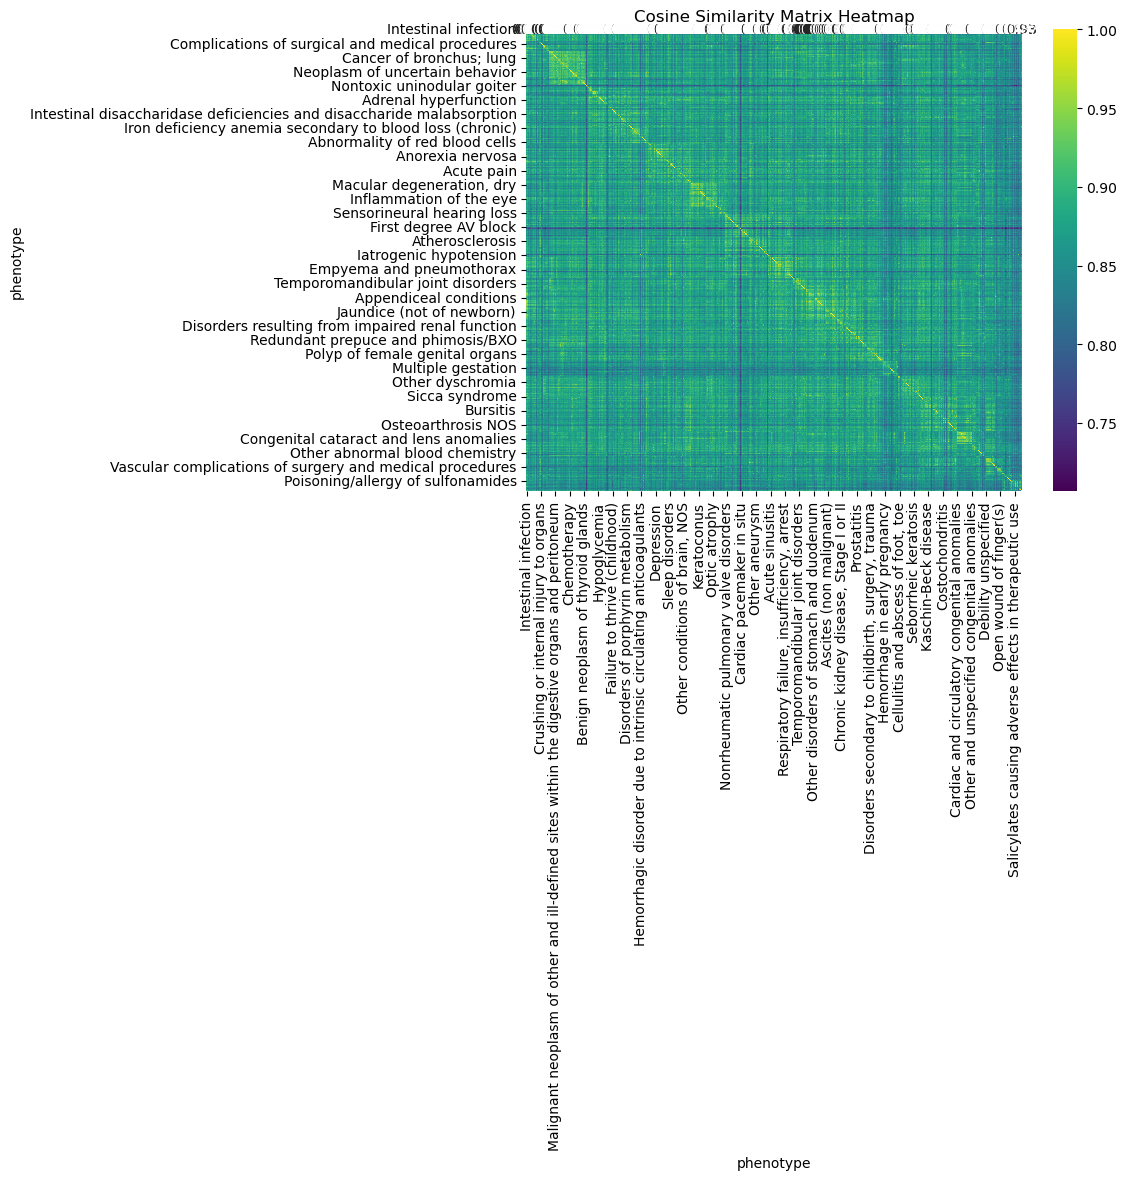

In [8]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(similarity_df, annot=True, cmap='viridis')
plt.title('Cosine Similarity Matrix Heatmap')
plt.show()

In [9]:

def find_similar_phenotypes(df, query, top_n=5):
    row = df.loc[query]

    # Sort the values in descending order
    sorted_row = row.sort_values(ascending=False)

    # Select the top n values
    top_values = sorted_row.head(top_n)
    return top_values

# Example usage
query_phenotype = "Ulcerative colitis"
top_n = 5
similar_phenotypes = find_similar_phenotypes(similarity_df, query_phenotype, top_n)
print(similar_phenotypes)

phenotype
Ulcerative colitis                  1.000000
Ulcerative colitis (chronic)        0.987653
Ulceration of the lower GI tract    0.962896
Gastric ulcer                       0.962446
Duodenal ulcer                      0.961821
Name: Ulcerative colitis, dtype: float64


In [ ]:
def find_similar_phenotypes(df, query, top_n=5):
    row = df.loc[query]
    sorted_row = row.sort_values(ascending=False)
    top_values = sorted_row.head(top_n)
    return top_values

# Example similarity DataFrame (assuming it's already defined as similarity_df)
# similarity_df = pd.DataFrame(...) # Define your similarity_df here

# Example usage
query_phenotype = "Ulcerative colitis"
top_n = 5
similar_phenotypes = find_similar_phenotypes(similarity_df, query_phenotype, top_n)

# Extract the indices of the top similar phenotypes
top_indices = similar_phenotypes.index

# Extract the submatrix for the heatmap
top_similarities = similarity_df.loc[top_indices, top_indices]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_similarities, annot=True, cmap='coolwarm', linewidths=.5)
plt.title(f'Top {top_n} Similar Phenotypes to {query_phenotype}')
plt.show()